## Usage of one explainer

Take EFM and Exp_EFM as an example, and use dataset amazon_toy.

In [1]:
from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import StratifiedSplit
from cornac.data.sentiment import SentimentModality
from cornac.models import EFM
from cornac.explainer import Exp_EFM

# Load the Amazon toy dataset
rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=10))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=10))

md = SentimentModality(data=sentiment_data)

eval_method = StratifiedSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

# Instantiate the EFM model
efm = EFM(
    max_iter=20,
    num_explicit_factors=128,
    num_latent_factors=128,
    num_most_cared_aspects=100,
    rating_scale=5.0,
    alpha=0.9,
    lambda_x=1,
    lambda_y=1,
    lambda_u=0.01,
    lambda_h=0.01,
    lambda_v=0.01,
    trainable=True,
)
efm.fit(eval_method.train_set)


# Instantiate the explainer
explainer = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)


/home/linan/miniconda3/envs/cornac/lib/python3.11/site-packages/tensorflow/python/debug/cli/debugger_cli_common.py:19: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants


rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 4188
Number of items = 10839
Number of ratings = 57970
Max rating = 5.0
Min rating = 1.0
Global mean = 4.3
---
Test data:
Number of users = 4188
Number of items = 10839
Number of ratings = 14325
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 4188
Total items = 10839


### Explain recommendations

In [2]:
# first, we need some recommendations
some_users = eval_method.test_set.user_ids[:3]
recomedations = efm.recommend_to_multiple_users(some_users, k=5)
print(recomedations)

           user_id     item_id  prediction
0   A2B8GXSCB1R05T  B0000524NG    3.675621
1   A2B8GXSCB1R05T  B006IMX18W    3.585776
2   A2B8GXSCB1R05T  B00154QBPI    3.265129
3   A2B8GXSCB1R05T  B009TQA8O4    3.255679
4   A2B8GXSCB1R05T  B0087SUH4Q    3.223850
5   A3TNM3C9ENUCFW  B0000524NG    3.630252
6   A3TNM3C9ENUCFW  B006IMX18W    3.530249
7   A3TNM3C9ENUCFW  B00154QBPI    3.266358
8   A3TNM3C9ENUCFW  B0087SUH4Q    3.263294
9   A3TNM3C9ENUCFW  B009TQA8O4    3.261469
10  A2TXMYYGSZCSZ1  B0000524NG    3.965525
11  A2TXMYYGSZCSZ1  B006IMX18W    3.767599
12  A2TXMYYGSZCSZ1  B00154QBPI    3.489161
13  A2TXMYYGSZCSZ1  B009TQA8O4    3.473320
14  A2TXMYYGSZCSZ1  B0087SUH4Q    3.452914


In [3]:
explainer.explain_recommendations(recomedations)

Computing explanations:   0%|          | 0/15 [00:00<?, ?it/s]

,user_id,item_id,prediction,explanations
0,A2B8GXSCB1R05T,B0000524NG,3.675621,"{'really': 5.853303, 'game': 5.668482, 'toy': ..."
1,A2B8GXSCB1R05T,B006IMX18W,3.585776,"{'really': 5.4458485, 'game': 5.7008715, 'toy'..."
2,A2B8GXSCB1R05T,B00154QBPI,3.265129,"{'really': 5.322633, 'game': 5.282972, 'toy': ..."
3,A2B8GXSCB1R05T,B009TQA8O4,3.255679,"{'really': 5.1935964, 'game': 5.377282, 'toy':..."
4,A2B8GXSCB1R05T,B0087SUH4Q,3.223850,"{'really': 5.6865864, 'game': 5.3711033, 'toy'..."
5,A3TNM3C9ENUCFW,B0000524NG,3.630252,"{'toy': 5.84621, 'game': 5.668482, 'doll': 5.8..."
6,A3TNM3C9ENUCFW,B006IMX18W,3.530249,"{'toy': 6.130971, 'game': 5.7008715, 'doll': 5..."
7,A3TNM3C9ENUCFW,B00154QBPI,3.266358,"{'toy': 5.663911, 'game': 5.282972, 'doll': 5...."
8,A3TNM3C9ENUCFW,B0087SUH4Q,3.263294,"{'toy': 5.795534, 'game': 5.3711033, 'doll': 5..."
9,A3TNM3C9ENUCFW,B009TQA8O4,3.261469,"{'toy': 5.8542466, 'game': 5.377282, 'doll': 5..."


### Explain one user-item pair

In [4]:
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
explanation = explainer.explain_one_recommendation_to_user(one_user, one_item)
print(f"For User {one_user} and Item {one_item}:")
print("Explanation:")
print(explanation)

For User A2B8GXSCB1R05T and Item B00004SDAP:
Explanation:
{'really': 3.861682, 'game': 2.7133155, 'toy': 3.9144073}


### Explain one user-item with ref-item

In [5]:
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
ref_item = eval_method.train_set.item_ids[10]
explanation = explainer.explain_one_with_ref(user_id=one_user, item_id=one_item, ref_item_id=ref_item)
explanation

,user_id,item_id,explanation,ref_item_id,ref_explanation
0,A2B8GXSCB1R05T,B00004SDAP,"{'really': 3.861682, 'game': 2.7133155, 'toy':...",B0045OV9IO,"{'really': 4.7144423, 'game': 4.8436193, 'toy'..."


In [6]:
# explanation for user-item
print(explanation['explanation'])
# and explanation for user-ref_item
print(explanation['ref_explanation'])

0    {'really': 3.861682, 'game': 2.7133155, 'toy':...
Name: explanation, dtype: object
0    {'really': 4.7144423, 'game': 4.8436193, 'toy'...
Name: ref_explanation, dtype: object


### Generate plot for Exp_EFM

In [7]:
users = eval_method.test_set.user_ids
recommendations = efm.recommend_to_multiple_users(users, k=10)
explanations = explainer.explain_recommendations(recommendations, feature_k=6)
explanations_df = explanations.copy()

Computing explanations:   0%|          | 0/41880 [00:00<?, ?it/s]

/home/linan/miniconda3/envs/cornac/lib/python3.11/site-packages/cornac-2.0.0-py3.11-linux-x86_64.egg/cornac/visualization/visualization.py:297: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(x_count, rotation=45)
/home/linan/miniconda3/envs/cornac/lib/python3.11/site-packages/cornac-2.0.0-py3.11-linux-x86_64.egg/cornac/visualization/visualization.py:299: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(x_coeff, rotation=45)


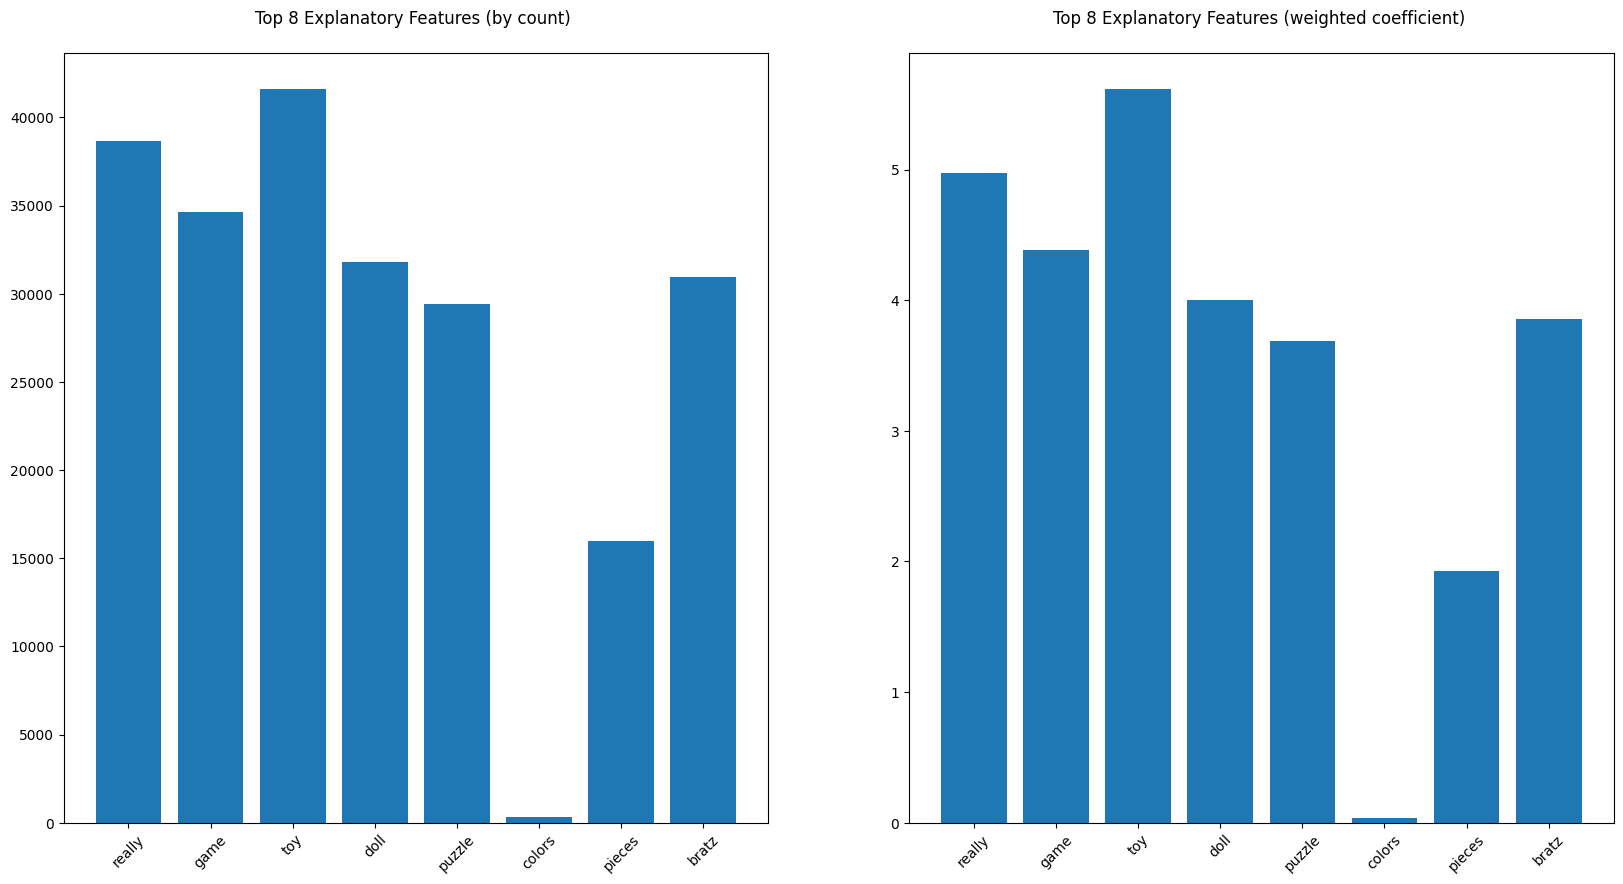

In [8]:
from cornac.visualization import Visualization
my_plots = Visualization()

# Create a plot for a specific user and item
one_user = eval_method.train_set.user_ids[15]
one_item = eval_method.train_set.item_ids[0]
ind_df = my_plots.create_individual_feature_importance_plot(
    explanations,
    user_id=one_user,
    item_id=one_item,
    type="bar",
    top_k=6,
    save_plot=False,
)

filtered_df = my_plots.create_aggregate_feature_importance_plot(
    explanations, type="bar", top_k=8, save_plot=False
)